In [1]:
# create_db.py
import sqlite3
import random

# For reproducibility (optional)
random.seed(42)

# Product catalog with approximate unit prices (you can edit/add items)
catalog = [
    ("Laptop", 55000),
    ("Phone", 20000),
    ("Headphones", 1500),
    ("Keyboard", 800),
    ("Mouse", 400),
    ("Monitor", 8000),
    ("Charger", 700),
    ("USB_Cable", 150),
    ("Speaker", 2500),
    ("Webcam", 3000)
]

# Connect/create database
conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()



In [2]:
# Create table
cur.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Generate 50 sample rows
sample_data = []
for _ in range(50):
    product, price = random.choice(catalog)
    # quantity between 1 and 10
    quantity = random.randint(1, 10)
    # Optionally add small random variation to price (simulating discounts or tax)
    price_variation = price * (1 + random.uniform(-0.05, 0.05))  # ±5%
    price_variation = round(price_variation, 2)
    sample_data.append((product, quantity, price_variation))

# Insert data
cur.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()
conn.close()

print("Database created with 50 sample records.")

Database created with 50 sample records.


📌 Sales Summary (by product)

   product  total_qty  total_revenue
    Laptop         18      987440.26
     Phone         41      822398.59
   Monitor         23      180525.05
   Speaker         41      104218.96
    Webcam         22       67043.59
   Charger         46       32117.12
Headphones         21       31418.63
  Keyboard         26       21070.49
     Mouse         20        8161.98
 USB_Cable          9        1299.33


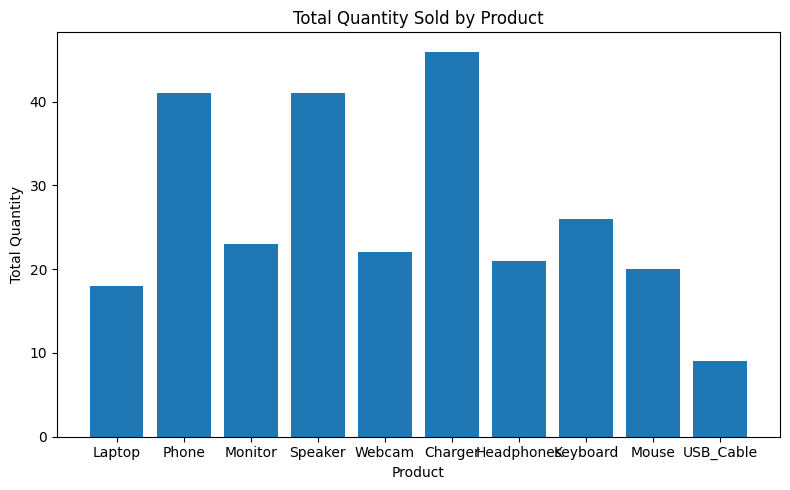

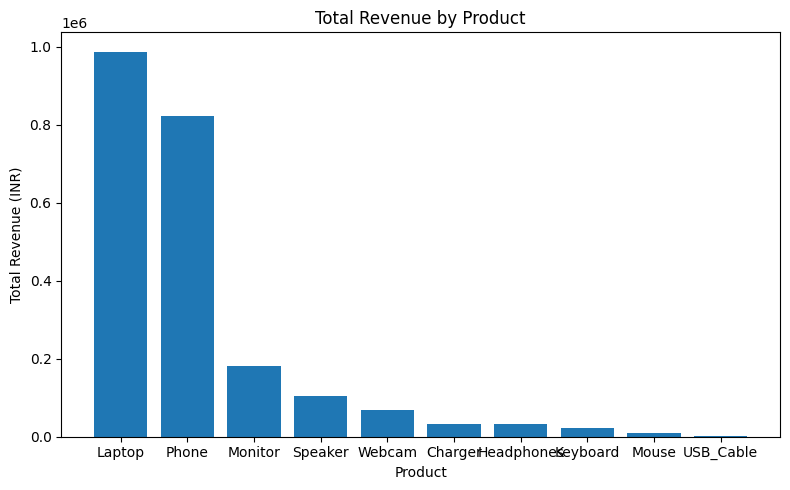

In [3]:
# sales_summary.py
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("sales_data.db")

# SQL Query: total qty and revenue by product
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
ORDER BY total_revenue DESC
"""

# Load into pandas
df = pd.read_sql_query(query, conn)

# Print results nicely
print("📌 Sales Summary (by product)\n")
print(df.to_string(index=False))

# Bar chart: total quantity sold
plt.figure(figsize=(8,5))
plt.bar(df["product"], df["total_qty"])
plt.title("Total Quantity Sold by Product")
plt.xlabel("Product")
plt.ylabel("Total Quantity")
plt.tight_layout()
plt.show()

# Bar chart: total revenue
plt.figure(figsize=(8,5))
plt.bar(df["product"], df["total_revenue"])
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue (INR)")
plt.tight_layout()
plt.show()

conn.close()
